In [48]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [49]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [50]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [51]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


C:\Users\gmimo\AppData\Local\Temp\ipykernel_3108\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


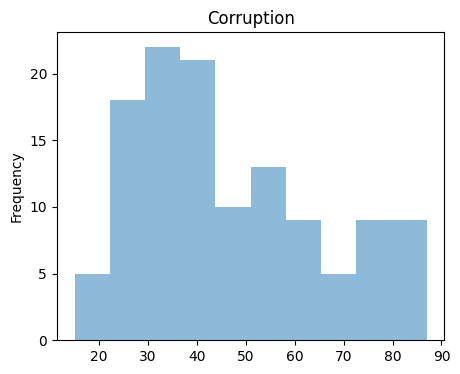

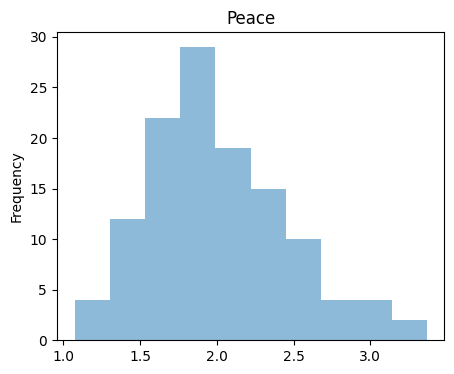

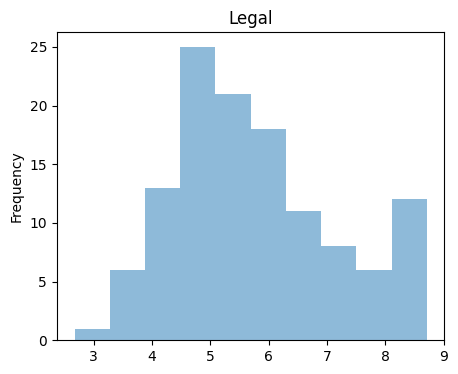

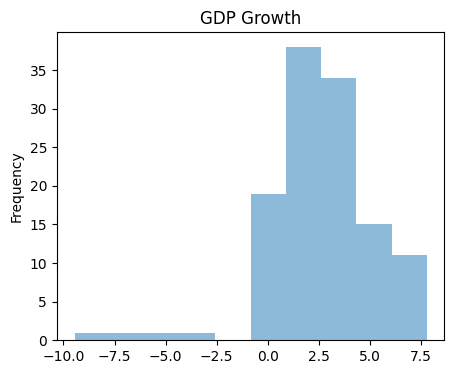

In [52]:
# plot histograms
plt.figure(1, figsize=(5,4))
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2, figsize=(5,4))
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3, figsize=(5,4))
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4, figsize=(5,4))
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [53]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth', 'Corruption']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth  Corruption
0 -0.390081 -0.878158    0.126952   -0.633230
1  0.472352 -0.958948   -0.040772   -0.633230
2 -0.026039 -0.484397   -2.230541   -0.098542
3  0.634871 -0.684553    1.303747   -0.258948
4 -1.261182  1.900001   -0.368418    1.612460


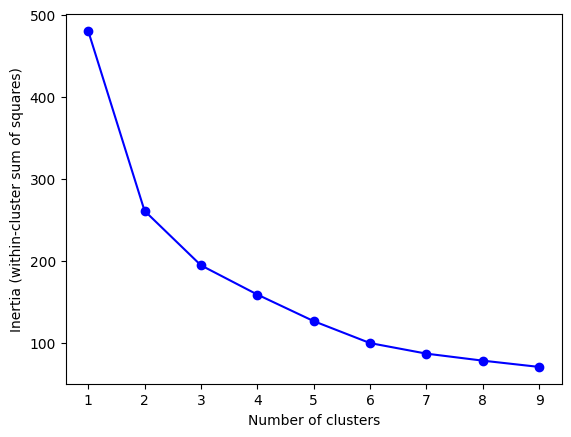

In [54]:
#Perform elbow method
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
Ks = range(1, 10)
inertia = [KMeans(i, n_init=10).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


In [55]:
#K means with k=3
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 194.4046655009297
cluster centers:  [[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]
cluster labels:  [1 1 2 1 0 0 1 1 1 0 1 1 1 0 2 1 2 1 0 2 0 1 1 0 1 0 0 2 0 1 2 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 0 2 2 0 1 1 0 1 1 0 2 1 1 1 1
 1 0 0 2 2 0 0 2 1 2 1 1 0 0 0 1 2 1 2 1 1 1 0 0 0 2 0 1 0 0 0 1 1 1 2 1 2
 1 2 0 0 0 0 1 2 1 2]


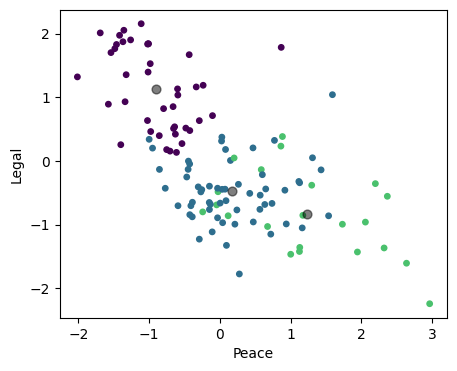

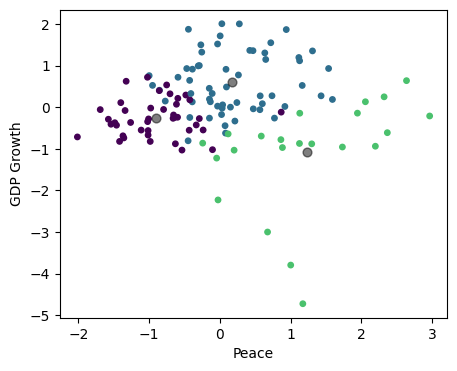

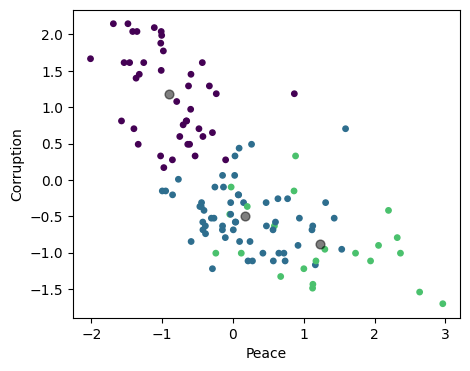

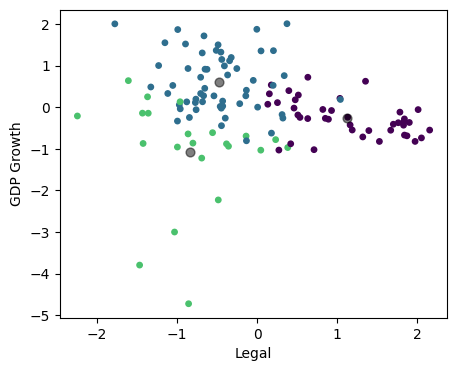

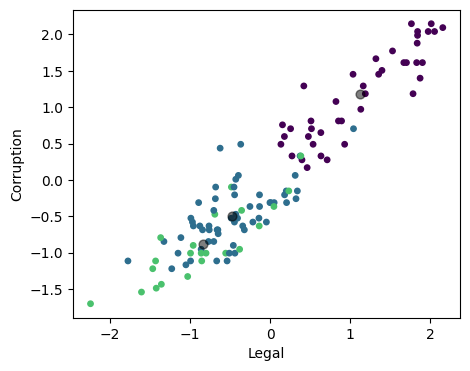

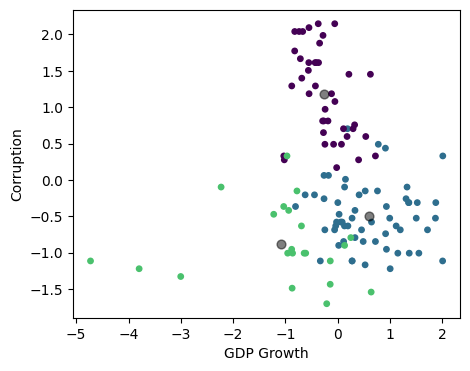

In [57]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_

cmap = cm.viridis
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)

figs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
labels = ['Peace', 'Legal', 'GDP Growth', 'Corruption']

for i in range(6):
    fig = plt.figure(i, figsize=(5,4))
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=15)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=40, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

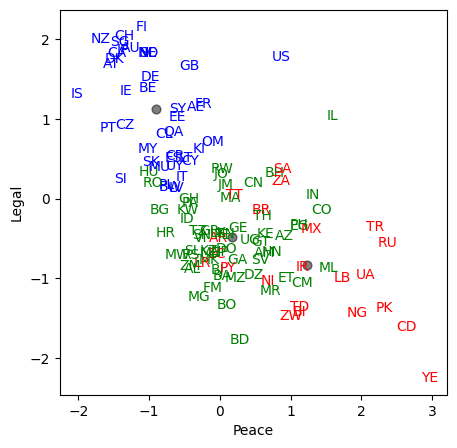

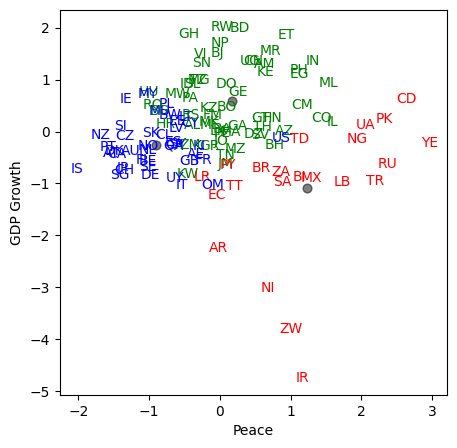

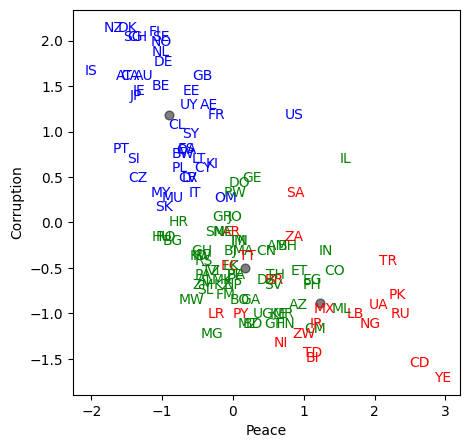

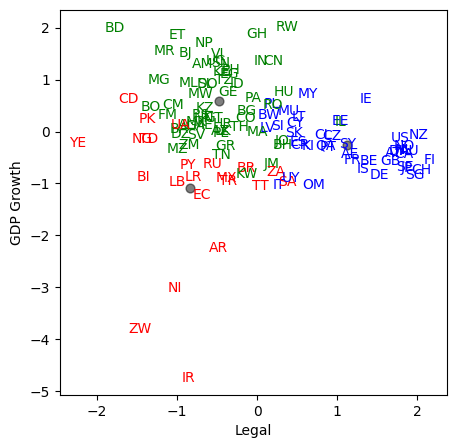

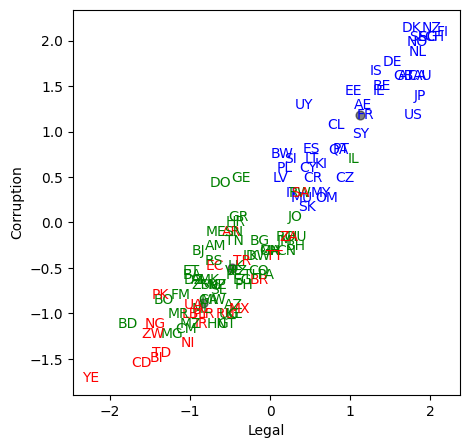

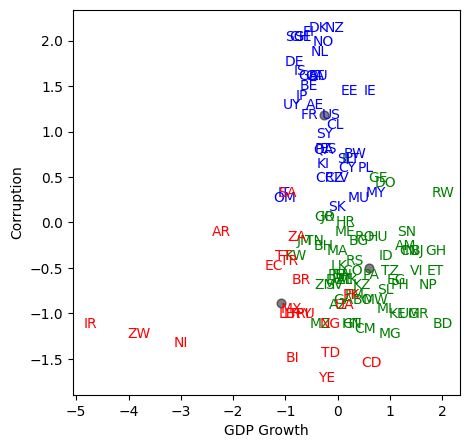

In [58]:
#Visualize the result (3 2D plots)
#plot country abbreviations instead of dots.
%matplotlib inline
import matplotlib.pyplot as plt


figs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
labels = ['Peace', 'Legal', 'GDP Growth', 'Corruption']
colors = ['blue','green', 'red']

for i in range(6):
    fig = plt.figure(i, figsize=(5, 5))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=40, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [59]:
print(X.columns)
print(centers)

Index(['Peace', 'Legal', 'GDP Growth', 'Corruption'], dtype='object')
[[-0.89877793  1.12417837 -0.26007806  1.17949284]
 [ 0.17066495 -0.47838646  0.5929059  -0.49863571]
 [ 1.22506036 -0.83385901 -1.07842464 -0.88356071]]


Label | Peace | Legal | GDP | Corruption | => Risk
---|---|---|---|---|---
0|+++|+++|++|+++|Moderate
1|++|++|+++|++|Low
2|+|+|+|+|High

In [60]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
result.loc[:, 'Risk'] = result['Label'].replace({0: 'Moderate', 1: 'Low', 2: 'High'})
with pd.option_context('display.max_rows', None, 'display.max_columns', 4):
    print(result.sort_values('Label'))


                          Country Abbrev  Label      Risk
51                          Italy     IT      0  Moderate
33                        Estonia     EE      0  Moderate
35                        Finland     FI      0  Moderate
36                         France     FR      0  Moderate
39                        Germany     DE      0  Moderate
45                        Iceland     IS      0  Moderate
49                        Ireland     IE      0  Moderate
53                          Japan     JP      0  Moderate
57                  Korea (South)     KI      0  Moderate
59                         Latvia     LV      0  Moderate
62                      Lithuania     LT      0  Moderate
65                       Malaysia     MY      0  Moderate
68                      Mauritius     MU      0  Moderate
75                    Netherlands     NL      0  Moderate
76                    New Zealand     NZ      0  Moderate
79                         Norway     NO      0  Moderate
80            

In [61]:
result.to_csv('results_kmeans_elbow_4.csv') 